# Regression_Project
## Punyatoya Behera

## Import Python Libraries

In [ ]:
# Import appropriate Python libraries
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Load the data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/codymbaldwin/sample-files/master/ad_spend.csv') # load csv file into dataframe

## Data Exploration

In [ ]:
df.shape # check dimension of dataset

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Number Conversion

In [ ]:
df[['TV','radio','newspaper']] = df[['TV','radio','newspaper']]/100 # converting advertisement spend columns from $10,000 to $1000,000
df.head()

,TV,radio,newspaper,sales
0,2.301,0.378,0.692,22.1
1,0.445,0.393,0.451,10.4
2,0.172,0.459,0.693,9.3
3,1.515,0.413,0.585,18.5
4,1.808,0.108,0.584,12.9


In [ ]:
df.head(8) # preview first 8 columns

,TV,radio,newspaper,sales
0,2.301,0.378,0.692,22.1
1,0.445,0.393,0.451,10.4
2,0.172,0.459,0.693,9.3
3,1.515,0.413,0.585,18.5
4,1.808,0.108,0.584,12.9
5,0.087,0.489,0.750,7.2
6,0.575,0.328,0.235,11.8
7,1.202,0.196,0.116,13.2


In [ ]:
df.describe() # generate descriptive stats.

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,1.470425,0.232640,0.305540,14.022500
std,0.858542,0.148468,0.217786,5.217457
min,0.007000,0.000000,0.003000,1.600000
25%,0.743750,0.099750,0.127500,10.375000
50%,1.497500,0.229000,0.257500,12.900000
75%,2.188250,0.365250,0.451000,17.400000
max,2.964000,0.496000,1.140000,27.000000


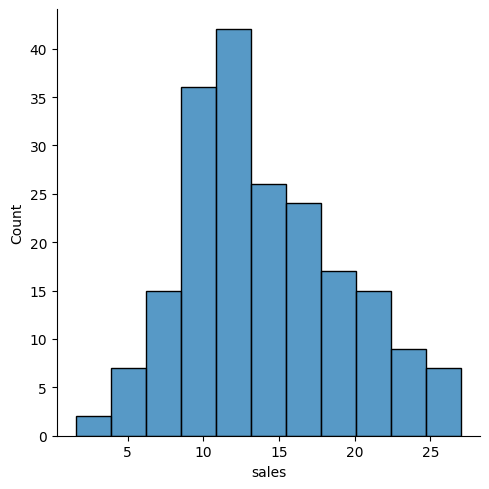

In [ ]:
sns.displot(df, x='sales'); # plot distribution graph

## Create new columns

In [ ]:
df['total_ad_spend'] = df['TV']+df['radio']+df['newspaper'] # create new column for total ad spend
df.head()

,TV,radio,newspaper,sales,total_ad_spend
0,2.301,0.378,0.692,22.1,3.371
1,0.445,0.393,0.451,10.4,1.289
2,0.172,0.459,0.693,9.3,1.324
3,1.515,0.413,0.585,18.5,2.513
4,1.808,0.108,0.584,12.9,2.500


In [ ]:
df['roi_percent'] = ((df['sales'] - df['total_ad_spend'])/df['total_ad_spend'])*100 # create new column for roi_percent
df.head()

,TV,radio,newspaper,sales,total_ad_spend,roi_percent
0,2.301,0.378,0.692,22.1,3.371,555.591813
1,0.445,0.393,0.451,10.4,1.289,706.826998
2,0.172,0.459,0.693,9.3,1.324,602.416918
3,1.515,0.413,0.585,18.5,2.513,636.171906
4,1.808,0.108,0.584,12.9,2.500,416.000000


## Generate Scatterplot

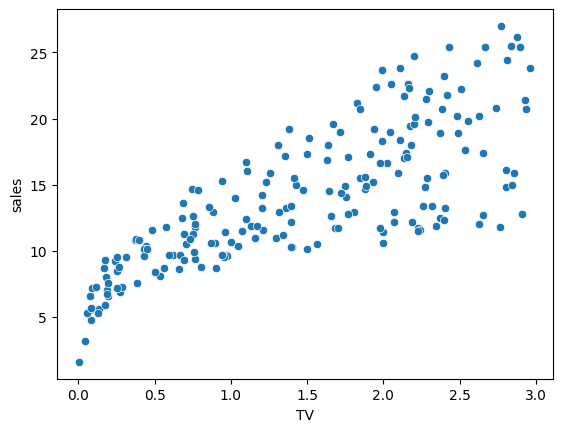

In [ ]:
sns.scatterplot(x = 'TV',y = 'sales',data = df); # generate scatterplot b/w tv ad spend and sales

## Generate a pairplot and a correlation matrix

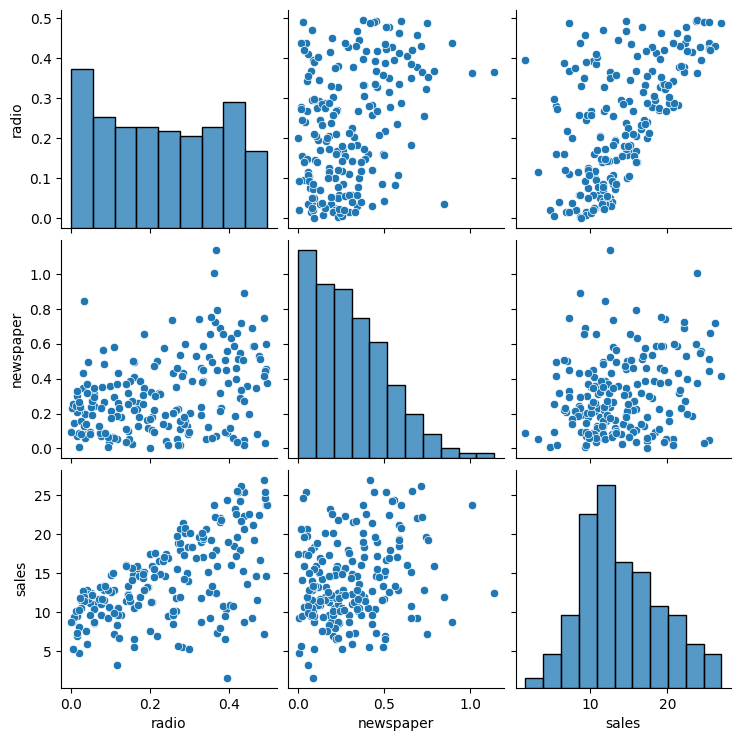

In [ ]:
sns.pairplot(df.iloc[:,1:4]); # generate pairplots

In [ ]:
df.corr() # generate correlation matrix

,TV,radio,newspaper,sales,total_ad_spend,roi_percent
TV,1.000000,0.054809,0.056648,0.782224,0.945330,-0.557013
radio,0.054809,1.000000,0.354104,0.576223,0.293211,-0.016154
newspaper,0.056648,0.354104,1.000000,0.228299,0.343059,-0.310481
sales,0.782224,0.576223,0.228299,1.000000,0.867712,-0.338714
total_ad_spend,0.945330,0.293211,0.343059,0.867712,1.000000,-0.589595
roi_percent,-0.557013,-0.016154,-0.310481,-0.338714,-0.589595,1.000000


## Model Preparation

In [ ]:
df = df.dropna() #drop null records
df.isnull().sum()

,0
TV,0
radio,0
newspaper,0
sales,0
total_ad_spend,0
roi_percent,0


In [ ]:
# Separate the dependent variable from independent variable
X = df[['TV','radio']]
y = df['sales']

In [ ]:
# Pull out some of the data and create a test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [ ]:
# Train the prediction model using the training data
model = LinearRegression()
model.fit(X_train.values, y_train)


LinearRegression()

In [ ]:
# Display the y-intercept and coefficients of our regression model
# y =b + mx
print(model.intercept_)
print(model.coef_)

2.9109237322037913
[ 4.41972877 19.94695311]


In [ ]:
# Predict sales for a specific scenario
new_X = [[500000,500000]]
model.predict(new_X)

array([12183343.85064387])

In [ ]:
# Make predictions in the test data
y_pred = model.predict(X_test.values)


In [ ]:
# Evaluate the performance of the model
metrics.r2_score(y_test, y_pred)

0.8580883042722334